## 伪代码
---
```python
随机创建k个点作为起始质心
当任意一个点的所述簇发生改变时：  
    对每个数据点：  
        对每个质心：  
            计算质心与数据点之间的距离  
        将数据点分配到距离其最近的簇  
    对每个簇，计算簇中所有点的均值并将均值作为簇的新质心 
``` 

#### 程序清单10-1 K-均值聚类函数

In [11]:
import numpy as np


def loadDataSet(filename):
    """数据加载函数"""
    dataMat=[]
    fr=open(filename)
    for line in fr.readlines():
        curLine=line.strip().split('\t')
        fline=list(map(float, curLine))
        dataMat.append(fline)
    return dataMat


def distEclud(vecA,vecB):
    """计算两个向量之间的欧几里得距离"""
    return np.sqrt(np.sum((vecA-vecB)**2))


def randCent(dataSet,k):
    """初始化簇质心,k是随机生成的质心的个数"""
    n=dataSet.shape[1]
    cent=np.mat(np.zeros((k,n)))    # 初始化k个质心
    for j in range(n):
        minJ=dataSet[:,j].min()
        maxJ=dataSet[:,j].max()
        rangeJ=float(maxJ-minJ)    # 第j个特征的范围
        cent[:,j]=minJ+rangeJ*np.random.rand(k,1)
    return cent


dataPath='D:\\机器学习实战代码\\machinelearninginaction\\Ch06\\testSet.txt'
datMat=np.mat(loadDataSet(dataPath))
datMat[0,:].A[0]

array([ 3.542485,  1.977398, -1.      ])

#### 程序清单10-2 K-均值聚类算法

In [15]:
def kMeans(dataSet, k,distMeas=distEclud,createCent=randCent):
    m=dataSet.shape[0]
    clusterAssment=np.mat(np.zeros((m,2)))    # 第一列：每个样本所属的类标签；第二列：存储误差
    center=createCent(dataSet,k)    # 随机初始化各个簇的质心
    clusterChanged=True
    
    while clusterChanged:
        clusterChanged=False
        for i in range(m):    # 遍历每个样本，寻找其属于哪个中心（哪个簇）
            minDist=np.inf
            minIndex=-1
            # 对每个质心，寻找距离该样本最短的质心
            for j in range(k):   
                # 这里需要注意，datMat[0,:]
                distJI = distEclud(center[j, :].A[0], dataSet[i, :].A[0])    # 注意，datMat[0,:]是一个二维的矩阵，需转换成向量
                if distJI<minDist:
                    minDist=distJI
                    minIndex=j    # 更新该样本属于哪个中心
            # 现在对于该样本已经找到了其属于哪个簇中心
            if clusterAssment[i,0]!=minIndex:    # 样本所属的簇发生改变：
                clusterChanged=True
            clusterAssment[i,:]=minIndex,minDist**2    # 更新簇结果分配矩阵
        # print(center)
        
        for c in range(k):
            ptsInClust=dataSet[np.nonzero(clusterAssment[:,0].A==c)[0]]    # 获取属于簇c的所有样本点
            center[c,:]=np.mean(ptsInClust,axis=0)    # 更新各个簇的质心
            
    return center,clusterAssment


centers,clusterAssment=kMeans(datMat[:,:2],4)

#### 可视化一下

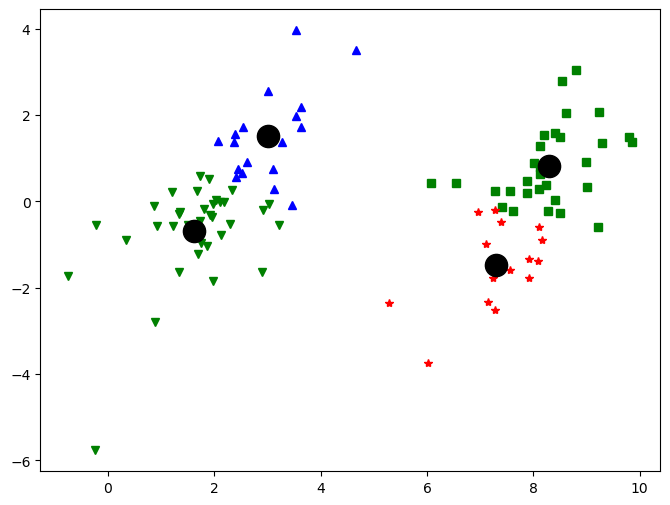

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
colorLabels=['r*','b^','gv','gs']    # 颜色与形状

# 可视化每一个簇的点
for ii,point in enumerate(datMat[:,:2].A):
    plt.plot(point[0],point[1],colorLabels[int(clusterAssment.A[ii][0])])
    
# 可视化聚类中心
for cpoint in centers.A:
    plt.plot(cpoint[0],cpoint[1],'ko',markersize=16.0,)

### 自己再写一遍kMeans

In [44]:
def kMeans1(dataSet:np.matrix, k=3):
    m=dataSet.shape[0]
    clusterAss=np.mat(np.zeros((m,2)))
    clusterChanged=True
    clusterCenter=randCent(dataSet,k)    # 随机初始化各个簇的质心
    
    while clusterChanged:
        clusterChanged=False
        for i in range(m):    # 对每个样本
            lowetDist=np.inf
            belongClust=-1
            for j in range(len(clusterCenter)):    # 对每个聚类中心
                dist=distEclud(dataSet[i,:].A[0],clusterCenter[j,:].A[0])
                if dist < lowetDist:
                    lowetDist=dist
                    belongClust=j
            if clusterAss[i,:].A[0][0]!=belongClust:
                clusterChanged=True
            clusterAss[i,:]=belongClust,lowetDist
            
        for c in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAss[:, 0] == c)[0], :]
            clusterCenter[c,:]=np.mean(ptsInClust,axis=0)    # 更新聚类中心
            
    return clusterCenter,clusterAss


kMeans1(datMat,k=4)

(matrix([[ 1.62325217, -0.68641439, -1.        ],
         [ 7.43138036, -0.8828804 ,  1.        ],
         [ 8.59657524,  1.21284019,  1.        ],
         [ 3.01905272,  1.51216744, -1.        ]]),
 matrix([[3.        , 0.70030052],
         [3.        , 1.04424857],
         [1.        , 0.70742399],
         [0.        , 0.84075475],
         [2.        , 0.47347751],
         [1.        , 0.33896531],
         [2.        , 0.8339864 ],
         [0.        , 1.18315964],
         [3.        , 0.6525768 ],
         [0.        , 1.29874428],
         [3.        , 1.22359492],
         [0.        , 0.50935026],
         [0.        , 2.23578931],
         [1.        , 1.47606534],
         [0.        , 0.53114453],
         [2.        , 0.75979723],
         [1.        , 1.23110992],
         [3.        , 2.58219118],
         [2.        , 0.51955135],
         [0.        , 0.99071765],
         [0.        , 0.47545799],
         [0.        , 0.86991414],
         [2.        , 1.0335

In [57]:
def recMC(coinValueList, change):
    """
    :param coinValueList: 面值列表
    :param change: 需要找零的钱数
    :return: 最少的硬币数量
    """
    minCoins = change
    if change in coinValueList:  # 基本结束条件
        return 1
    else:
        for i in [c for c in coinValueList if c < change]:
            numCoins = 1 + recMC(coinValueList, change - i)
            # 这里，需要找零的前减去一个面值的硬币对应的钱，规模减小，同时，
            # 需要将硬币数量+1，因为已经用了一个硬币(change - i)
            if numCoins < minCoins:  # 如果问题得到优化，则更新最优值
                minCoins = numCoins    # 感觉这里只更新一次minCoins
    return minCoins


recMC([1,5,10,20,50,100],16)

3

In [3]:
def dpMakeChange(coinValueList,change,minCoins):
    '''
    coinValueList:货币体系表
    change:需要找零的钱数
    minCoins:储存最少硬币数量的列表,程序执行后应对应上语雀中的表格,实际上是哈希
    '''
    # 从1分开始到change逐个计算最少硬币数量
    for cents in range(1,change+1):
        coinCount=cents    # 初始化找零硬币的最大值
        # 减去每个硬币，向后查找最少硬币数，同时记录总的最小数
        for j in [c for c in coinValueList if c<=cents]:    # 在币值体系中迭代
            if minCoins[coinCount-j]+1<coinCount:    # 如果兑换一个硬币后，整体硬币数量小于
                coinCount=minCoins[coinCount-j]+1    # 这里minCoins[coinCount-j]之前已经算好了
        # 得到当前最少硬币数，记录到表中
        minCoins[cents]=coinCount

    return minCoins


print(dpMakeChange([1,5,10,21,25],63,[0]*64))

3